# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import cv2
import seaborn as sns

In [120]:
tip = pd.read_csv("./data/tips.csv")
tip

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [69]:
tip.total_bill
tip.total_bill.value_counts()

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

In [70]:
#so luong ngay duoc tips nhieu nhat
tip.day
tip.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [71]:
#khoang thoi gian thoi duoc tips 
tip.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [72]:
#so nguoi hut thuoc va khong hut thuoc
tip.smoker
tip.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [73]:
#s luong nguoi dung bua an
tip["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [74]:
#với khách hàng là nam và hút thuốc thì lượng tip là bao nhiêu
nam_hut_thuoc =tip.query('sex == "Male" and smoker == "Yes"')
nam_hut_thuoc

# ndc.query('time == "Lunch"')


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
56,56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4
69,69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
80,80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,83,32.68,5.00,Male,Yes,Thur,Lunch,2


In [75]:
#với nam hút thuốc đi cặp thì lượng hút thuốc là bao nhiêu
ndc =tip.query('sex == "Male" and smoker == "Yes" and size ==2')
ndc

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
58,58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,62,11.02,1.98,Male,Yes,Sat,Dinner,2
69,69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,76,17.92,3.08,Male,Yes,Sat,Dinner,2
80,80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,83,32.68,5.00,Male,Yes,Thur,Lunch,2
90,90,28.97,3.00,Male,Yes,Fri,Dinner,2
96,96,27.28,4.00,Male,Yes,Fri,Dinner,2


In [76]:
#nam đi nhiều 
ndn =tip.query('sex == "Male" and smoker == "Yes" and size >2')
ndn

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
56,56,38.01,3.00,Male,Yes,Sat,Dinner,4
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
170,170,50.81,10.00,Male,Yes,Sat,Dinner,3
180,180,34.65,3.68,Male,Yes,Sun,Dinner,4
182,182,45.35,3.50,Male,Yes,Sun,Dinner,3
183,183,23.17,6.50,Male,Yes,Sun,Dinner,4
187,187,30.46,2.00,Male,Yes,Sun,Dinner,5
189,189,23.10,4.00,Male,Yes,Sun,Dinner,3
200,200,18.71,4.00,Male,Yes,Thur,Lunch,3


In [77]:
#với nam hút thuốc đi cặp thì lượng hút thuốc là bao nhiêu vào buổi tối
ndc.query("time =='Lunch'")


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
80,80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,138,16.00,2.00,Male,Yes,Thur,Lunch,2
192,192,28.44,2.56,Male,Yes,Thur,Lunch,2
193,193,15.48,2.02,Male,Yes,Thur,Lunch,2
194,194,16.58,4.00,Male,Yes,Thur,Lunch,2
196,196,10.34,2.00,Male,Yes,Thur,Lunch,2
199,199,13.51,2.00,Male,Yes,Thur,Lunch,2
220,220,12.16,2.20,Male,Yes,Fri,Lunch,2
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2


## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [78]:
#xóa cột Unnamed:0

tip_xoa_unnamed = tip.drop(columns=['Unnamed: 0'])
tip_xoa_unnamed

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [79]:
#du lieu có bao nhiêu dòng và bao nhiêu thuộc tính

print("số dòng và số thuộc tính của dữ liệu là: ", tip.shape[0], "và", tip.shape[1])

số dòng và số thuộc tính của dữ liệu là:  244 và 8


In [80]:
# 4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
#thuộc tính định tính là:
# x = tip.info()
categorical_cols = tip.select_dtypes(include=['object', 'category', 'bool']).columns
print("Các cột định tính:", categorical_cols)
numerical_cols = tip.select_dtypes(include=['int64', 'float64']).columns
print("Các cột định lượng:", numerical_cols)



Các cột định tính: Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Các cột định lượng: Index(['Unnamed: 0', 'total_bill', 'tip', 'size'], dtype='object')


In [81]:

# 5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
tong=tip.sex.size 
nam = nu = 0
for i in tip.sex:
    if i == "Male":
        nam +=1
    else: nu +=1

print("số lượng nam là", nam," nữ là",nu)

tilenam=  nam/tong *100
tilenu= nu/tong *100

print(f"tỷ lệ nam là {round(tilenam,2)}%")
print(f"tỷ lệ nữ chiếm {round(tilenu, 2)}% ")

số lượng nam là 157  nữ là 87
tỷ lệ nam là 64.34%
tỷ lệ nữ chiếm 35.66% 


In [82]:
# 6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?

hutthuoc  = tip.query('smoker == "Yes" ')
ht=0
for i in range(len(hutthuoc)):
    ht +=1
tilehut = ht/tong * 100
print(f"tong số người hút thuốc chiếm tỉ lệ là: {round(tilehut,3)}")




tong số người hút thuốc chiếm tỉ lệ là: 38.115


In [83]:
# 7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?

print(f"ngày có nhiều khách ăn nhất là {tip.day.max()}")


ngày có nhiều khách ăn nhất là Thur


In [84]:
# 8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?

print(f"bữa ăn mà nhà hàng phục vụ nhiều nhất là {tip.time.max()}")



bữa ăn mà nhà hàng phục vụ nhiều nhất là Lunch


In [85]:
# 9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
songuoi = tip["size"]
print(f"số người dùng bữa nhiều nhất {songuoi.max()}")


số người dùng bữa nhiều nhất 6


In [86]:
# 10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
print(f"trung bình một bữa nhà hàng phục vụ {round(songuoi.mean(), 2)} khách")


trung bình một bữa nhà hàng phục vụ 2.57 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

In [87]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?

x = tip["tip"].sum()
print(f"tỷ lệ nhận được tiền tip của nhà hàng là {x/tip["tip"].count()}")

# 2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
y = tip["tip"].sum()
print(f"tỷ lệ nhận được tiền tip của nhà hàng là {y/tip["total_bill"].sum()}")


# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
namtips = tip.query("sex == 'Male'")
nutips = tip.query("sex == 'Female'")

m_total_tips = namtips['tip'].mean()

fm_total_tips = nutips['tip'].mean()

if m_total_tips> fm_total_tips:
    print(f"nam là người tip nhiều hơn và thường xuyên hơn với mỗi {round(m_total_tips, 3)} bill")
else:
    print(f"nu là người tip nhiều hơn và thường xuyên hơn với mỗi {round(fm_total_tips, 3)} bill")
    


# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
nguoismoker = tip.query("smoker == 'Yes'")
nguoikosmoker = tip.query("smoker == 'No'")

m_total_smoker = nguoismoker['tip'].mean()

m_total_nonsmoker = nguoikosmoker['tip'].mean()

if m_total_smoker> m_total_nonsmoker:
    print(f"nguười hút thuốc là người tip nhiều hơn và thường xuyên hơn với mỗi {round(m_total_smoker, 3)} bill")
else:
    print(f"người không hút thuốc là người tip nhiều hơn và thường xuyên hơn với mỗi {round(m_total_nonsmoker, 3)} bill")



# 5. Thống kê tổng số tiền tip nhận được theo ngày.
t2 =round(tip.query("day == 'Mon'")['tip'].sum(), 3)
t3 =round(tip.query("day == 'Tue'")['tip'].sum(), 3)
t4 =round(tip.query("day == 'Wen'")['tip'].sum(), 3)
t5 =round(tip.query("day == 'Thur'")['tip'].sum(), 3)
t6 =round(tip.query("day == 'Fri'")['tip'].sum(), 3)
t7 =round(tip.query("day == 'Sat'")['tip'].sum(), 3)
cn =round(tip.query("day == 'Sun'")['tip'].sum(), 3)


print(f"tổng số tiền tip nhận được theo ngày thứ hai là {t2}")
print(f"tổng số tiền tip nhận được theo ngày thứ ba là {t3}")
print(f"tổng số tiền tip nhận được theo ngày thứ tư là {t4}")
print(f"tổng số tiền tip nhận được theo ngày thứ năm là {t5}")
print(f"tổng số tiền tip nhận được theo ngày thứ sáu là {t6}")
print(f"tổng số tiền tip nhận được theo ngày thứ bảy là {t7}")
print(f"tổng số tiền tip nhận được theo ngày chủ nhật là {cn}")




tỷ lệ nhận được tiền tip của nhà hàng là 2.99827868852459
tỷ lệ nhận được tiền tip của nhà hàng là 0.15153580224410024
nam là người tip nhiều hơn và thường xuyên hơn với mỗi 3.09 bill
nguười hút thuốc là người tip nhiều hơn và thường xuyên hơn với mỗi 3.009 bill
tổng số tiền tip nhận được theo ngày thứ hai là 0.0
tổng số tiền tip nhận được theo ngày thứ ba là 0.0
tổng số tiền tip nhận được theo ngày thứ tư là 0.0
tổng số tiền tip nhận được theo ngày thứ năm là 171.83
tổng số tiền tip nhận được theo ngày thứ sáu là 51.96
tổng số tiền tip nhận được theo ngày thứ bảy là 260.4
tổng số tiền tip nhận được theo ngày chủ nhật là 247.39


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

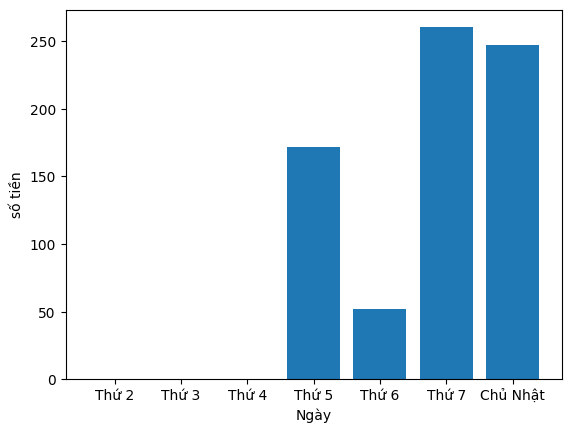

In [88]:
#đồ thị thể hiện tổng số tiền tip theo ngày là:
x = np.array([t2,t3,t4,t5,t6,t7,cn])
x_label = (["Thứ 2", "Thứ 3", "Thứ 4", "Thứ 5", "Thứ 6", "Thứ 7", "Chủ Nhật"])
plt.ylabel("số tiền")
plt.xlabel("Ngày")
plt.bar(x_label,x)
plt.show()


<BarContainer object of 3 artists>

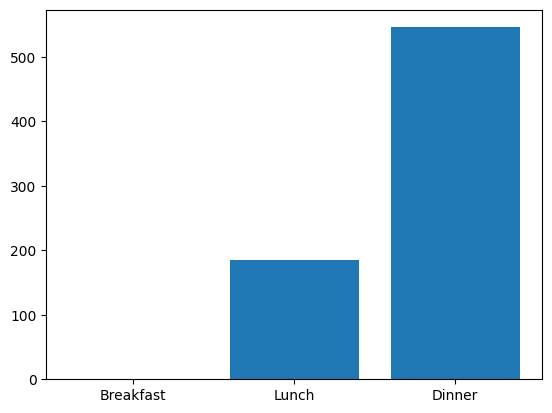

In [89]:
#vẽ dồ thị tổng số tiền tip theo bữa ăn (time)
Brf =  tip.query("time == 'Breakfast'")['tip'].sum()
Lun =  tip.query("time == 'Lunch'")['tip'].sum()
Din =  tip.query("time == 'Dinner'")['tip'].sum()


X = np.array([Brf, Lun, Din])
X_Label = ["Breakfast", "Lunch", "Dinner"]
plt.bar(X_Label, X)

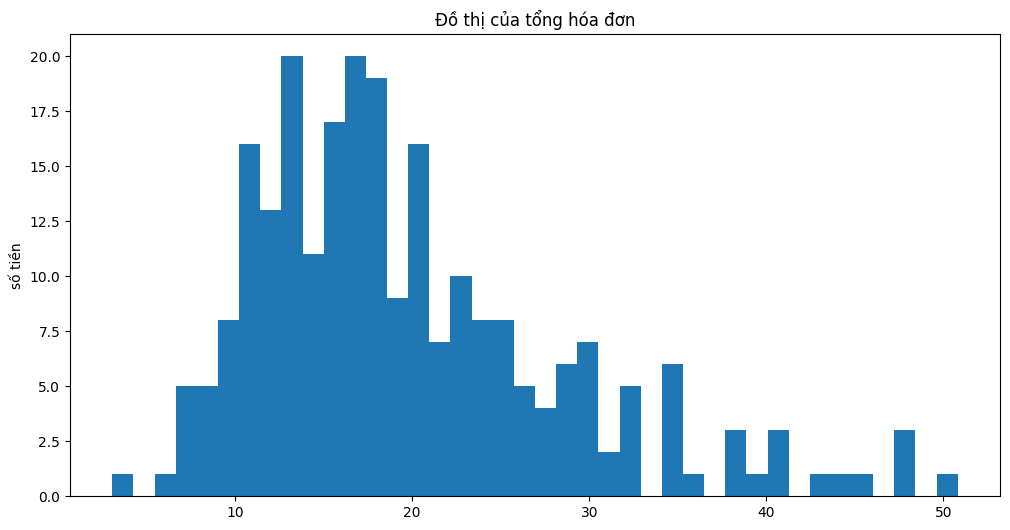

In [128]:
#Vẽ đồ thị Histogram Của tổng hóa đơn

plt.figure(figsize = (12, 6))
plt.ylabel("số tiền")
plt.title("Đồ thị của tổng hóa đơn")
plt.hist(tip["total_bill"], bins = 40)
plt.show()

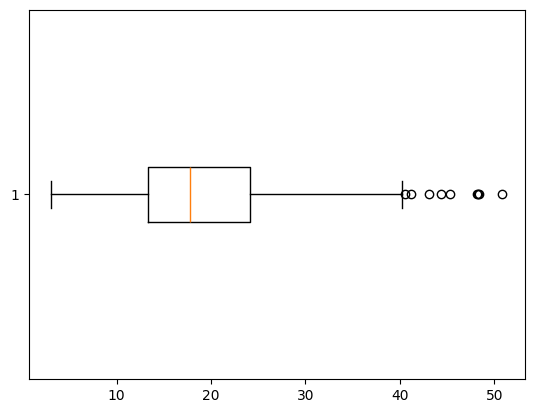

In [91]:
# Vẽ đồ thị boxplot của tổng hóa đơn

# data
plt.boxplot((tip["total_bill"]), vert = False)
plt.show()


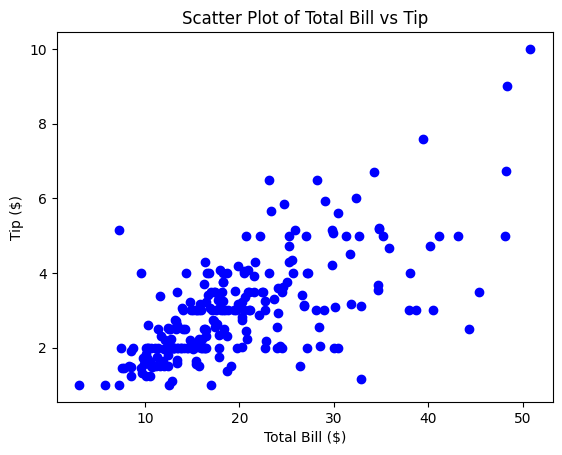

In [136]:
#Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hóa đơn là tiền tip

plt.scatter(tip['total_bill'], tip['tip'], color='blue')

plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

# Hiển thị biểu đồ
plt.show()


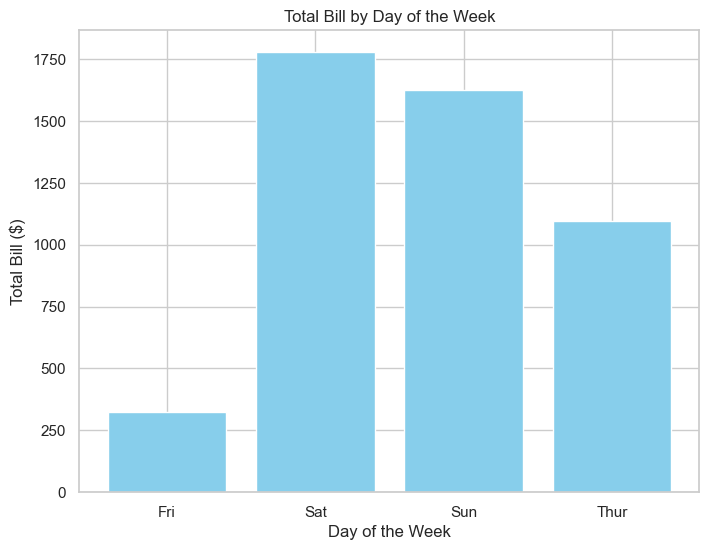

In [144]:

# Tính tổng số tiền hóa đơn theo từng ngày (giả sử cột 'total_bill' là tổng hóa đơn và 'day' là ngày)
total_bill_by_day = tip.groupby('day')['total_bill'].sum()

# Vẽ biểu đồ cột để so sánh số tiền khách hàng đã chi giữa các ngày trong tuần
plt.figure(figsize=(8,6))
plt.bar(total_bill_by_day.index, total_bill_by_day.values)

# Thêm tiêu đề và nhãn trục
plt.title('Total Bill by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')

# Hiển thị biểu đồ
plt.show()



## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

In [94]:
# tip = pd.read_csv("./data/tips.csv")

<Axes: >

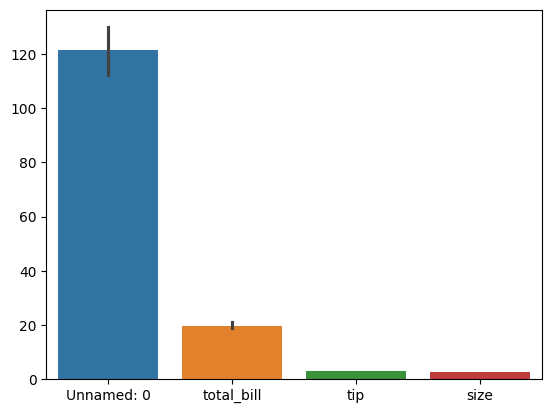

In [95]:
sns.barplot(data=tip)

[Text(0.5, 0, 'Day of the Week'), Text(0, 0.5, 'Total Tips ($)')]

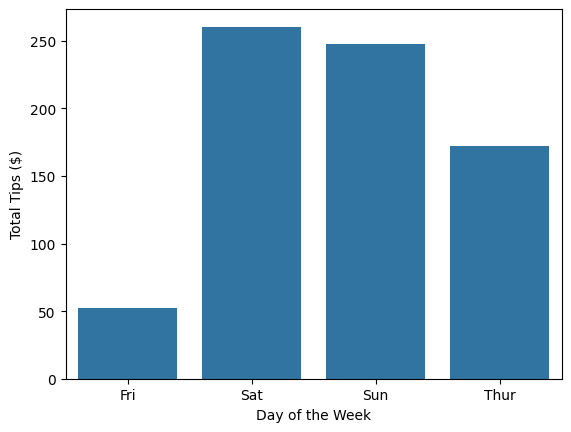

In [ ]:


# Tính tổng số tiền tip theo từng ngày
tip_by_day = tip.groupby('day')['tip'].sum().reset_index()

# Vẽ biểu đồ với Seaborn
ax = sns.barplot(x='day', y='tip', data=tip_by_day)

# Tùy chỉnh nhãn trục (nếu cần)
ax.set(xlabel='Day of the Week', ylabel='Total Tips ($)')


#vẽ dồ thị thể hiện tổng số tiền tip theo bữa ăn



[Text(0.5, 0, 'Day of the Week'),
 Text(0, 0.5, 'Total Tips ($)'),
 Text(0.5, 1.0, 'Total Tips by Time')]

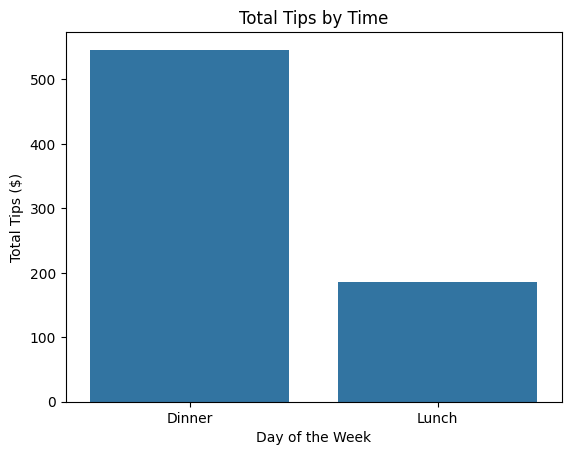

In [115]:
# Tính tổng số tiền tip theo bữa ăn
tip_by_time = tip.groupby('time')['tip'].sum().reset_index()

time = sns.barplot(x='time', y='tip',data= tip_by_time)
time.set(xlabel = 'Time of disk', ylabel = 'Tips ($)', title = ('Total Tips by Time'))


<Figure size 1000x700 with 0 Axes>

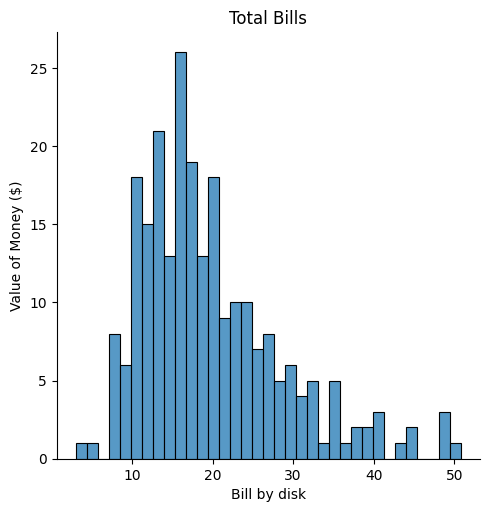

In [134]:
# Vẽ đồ thị histogram của tổng hóa đơn
total = tip.total_bill
plt.figure(figsize=(10,7))
hist = sns.displot(kind = "hist",x='total_bill',bins = 35,data= tip)
hist.set(title=('Total Bills'),xlabel=('Bill by dishes'),ylabel=('Value of Money ($)'))


plt.show()

#vẽ đồ thị boxplot của tổng hóa đơn

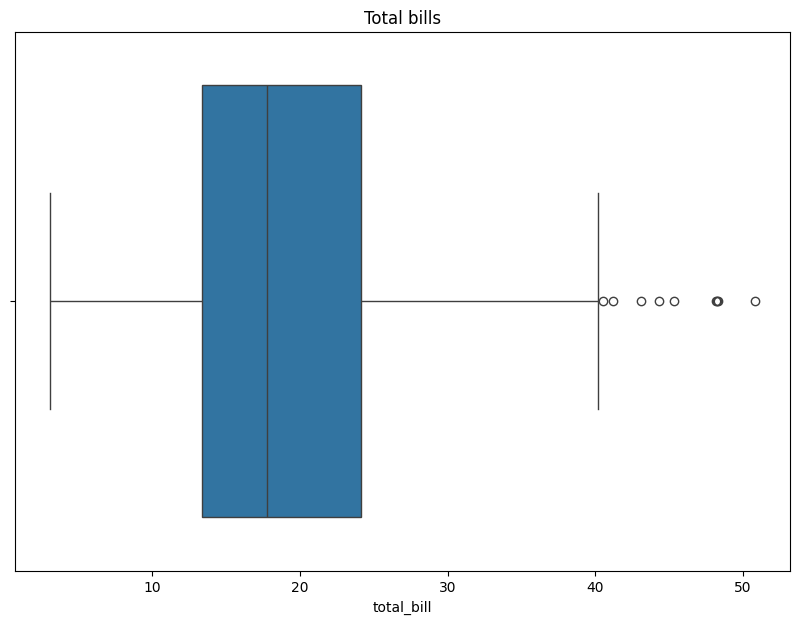

In [133]:
# Vẽ đồ thị histogram của tổng hóa đơn
total = tip.total_bill
plt.figure(figsize=(10,7))
box = sns.boxplot(x = total)
box.set(title=('Total bills'))


plt.show()

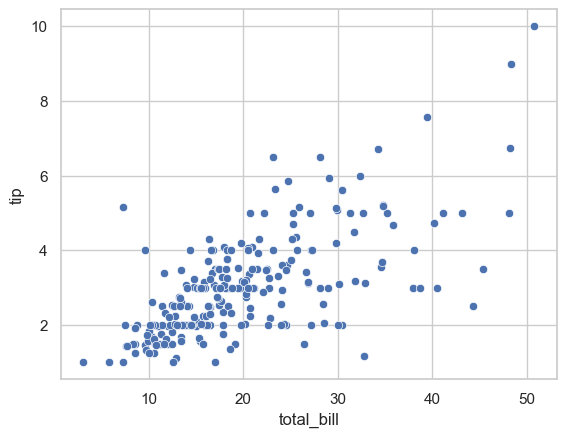

In [148]:

# Vẽ biểu đồ scatter plot để kiểm tra mối liên hệ giữa total_bill và tip
sns.scatterplot(x='total_bill', y='tip', data=tip)

# Thêm tiêu đề và nhãn trục
sns.set(style="whitegrid")


<Axes: xlabel='day', ylabel='total_bill'>

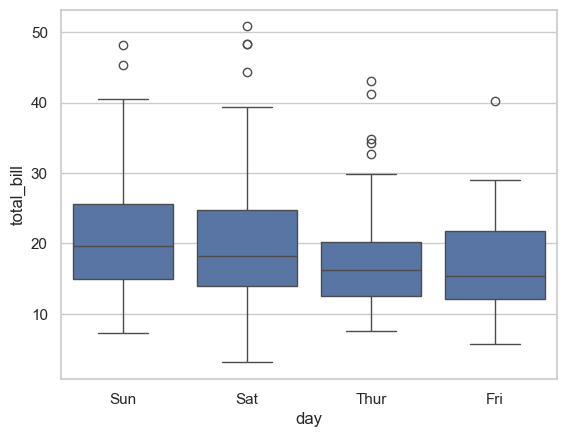

In [143]:
sns.boxplot(x='day', y='total_bill', data=tip)